
# 1. Setup



In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

# Using the URL for the file
spotify_original = pd.read_csv("dataset.csv")

spotify_original_reshape = spotify_original.iloc[:,1:]

# 2. Data Cleaning

In [2]:
# Cleaning rows with missing information
missing_data_rows = spotify_original_reshape[spotify_original_reshape.isnull().any(axis=1)]

missing_data_rows

spotify_original_reshape_drop = spotify_original_reshape.dropna()

print(spotify_original_reshape.shape)
print(spotify_original_reshape_drop.shape)

(114000, 20)
(113999, 20)


In [3]:
#clean track_name and artists columns by stripping spaces and converting to lowercase
spotify_original_reshape_drop['track_name_clean'] = spotify_original_reshape_drop['track_name'].str.strip().str.lower()
spotify_original_reshape_drop['artists_clean'] = spotify_original_reshape_drop['artists'].str.strip().str.lower()

#priority list for genres to handle duplicates
genre_priority = ['pop', 'rock', 'hip hop', 'rap', 'reggaeton', 'latin', 'electronic', 'r&b', 'reggae', 'dance', 'classical']
spotify_original_reshape_drop['genre_priority'] = spotify_original_reshape_drop['track_genre'].apply(lambda x: genre_priority.index(x) if x in genre_priority else len(genre_priority))

#sort the dataset by track_name, artists, genre priority, popularity, and duration
spotify_data_sorted = spotify_original_reshape_drop.sort_values(by=['track_name_clean', 'artists_clean', 'genre_priority', 'popularity', 'duration_ms'],
                                                                ascending=[True, True, True, True, False])

#remove duplicates
spotify_cleaned = spotify_data_sorted.drop_duplicates(subset=['track_name_clean', 'artists_clean'], keep='first')

# checking size
print(f"Shape of the dataset before cleaning: {spotify_original_reshape_drop.shape}")
print(f"Shape of the dataset after cleaning: {spotify_cleaned.shape}")

# removing extra columns added
spotify_cleaned_final = spotify_cleaned.drop(columns=['track_name_clean', 'artists_clean', 'genre_priority'])

# Fcheck size again
print(f"Shape of the dataset after removing extra columns: {spotify_cleaned_final.shape}")


spotify_cleaned_final

Shape of the dataset before cleaning: (113999, 23)
Shape of the dataset after cleaning: (81206, 23)
Shape of the dataset after removing extra columns: (81206, 20)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
36750,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,4,french
92751,1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,"""A"" You're Adorable",39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,4,rockabilly
66996,73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,"""C"" is for Cookie",8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,4,kids
101161,0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,Classical Christmas,"""Christe, Redemptor omnium""",0,289133,False,0.111,0.0568,10,-28.053,1,0.0551,0.9900,0.697000,0.1100,0.0395,169.401,1,sleep
82584,5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,C I V I L W A R,"""Contemplate This on the Tree of Woe.""",24,180706,False,0.565,0.9770,11,-3.592,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,4,power-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65756,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,Hotel del Luna (Original Television Soundtrack...,내 맘을 볼 수 있나요,63,225785,False,0.397,0.1660,9,-10.678,1,0.0349,0.8840,0.000000,0.1000,0.1310,134.708,4,k-pop
65859,4kIpBfvK44bxqX7zo8K1oP,Gaho,ITAEWON CLASS (Original Television Soundtrack)...,시작,65,202440,False,0.591,0.8180,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.5740,108.107,4,k-pop
75903,4mHc7LUlO3k6AXeFV2EiJK,Yiruma,Yiruma Official Album 'Piano Therapy' (The Ori...,약속 (Piano Solo),37,144533,False,0.504,0.1430,1,-18.713,1,0.0701,0.9800,0.922000,0.1240,0.0584,148.786,4,new-age
79554,0tQesiSZJQOdHeAC7r59us,GODA,One Punch Man (Original Soundtrack),원펀맨 Theme - Sad Theme,37,228000,False,0.542,0.3370,2,-16.088,1,0.0539,0.9850,0.933000,0.1470,0.4430,159.951,4,piano


In [4]:
# Merge Genres
genre_mapping = {
    # Pop
    'pop': 'Pop', 'power-pop': 'Pop', 'synth-pop': 'Pop', 'indie-pop': 'Pop',
    'k-pop': 'Pop', 'j-pop': 'Pop', 'cantopop': 'Pop', 'mandopop': 'Pop',
    'british': 'Pop', 'spanish': 'Pop', 'latino': 'Pop', 'pop-film': 'Pop',
    'pagode': 'Pop', 'j-idol': 'Pop', 'sad': 'Pop',
    
    # Rock
    'rock': 'Rock', 'rock-n-roll': 'Rock', 'alt-rock': 'Rock', 'indie': 'Rock',
    'hard-rock': 'Rock', 'punk-rock': 'Rock', 'garage': 'Rock', 'psych-rock': 'Rock',
    'grunge': 'Rock', 'guitar': 'Rock', 'ska': 'Rock', 'emo': 'Rock', 'punk': 'Rock',
    'death-metal': 'Rock', 'hardcore': 'Rock', 'metal': 'Rock', 'heavy-metal': 'Rock',
    'black-metal': 'Rock', 'metalcore': 'Rock', 'j-rock': 'Electronic/Dance', 'rockabilly': 'Rock',
    'alternative': 'Rock',
    
    # Electronic/Dance
    'electronic': 'Electronic/Dance', 'edm': 'Electronic/Dance', 'house': 'Electronic/Dance',
    'deep-house': 'Electronic/Dance', 'progressive-house': 'Electronic/Dance',
    'techno': 'Electronic/Dance', 'minimal-techno': 'Electronic/Dance',
    'detroit-techno': 'Electronic/Dance', 'trance': 'Electronic/Dance',
    'dubstep': 'Electronic/Dance', 'drum-and-bass': 'Electronic/Dance',
    'breakbeat': 'Electronic/Dance', 'club': 'Electronic/Dance',
    'dancehall': 'Electronic/Dance', 'j-dance': 'Electronic/Dance', 'disco': 'Electronic/Dance',
    'hardstyle': 'Electronic/Dance', 'chill': 'Electronic/Dance',
    'electro': 'Electronic/Dance', 'dance': 'Electronic/Dance',
    
    # Hip-Hop/R&B
    'hip-hop': 'Hip-Hop/R&B', 'r-n-b': 'Hip-Hop/R&B', 'funk': 'Hip-Hop/R&B',
    'afrobeat': 'Hip-Hop/R&B', 'reggaeton': 'Hip-Hop/R&B', 'dub': 'Hip-Hop/R&B',
    'groove': 'Hip-Hop/R&B', 'reggae': 'Hip-Hop/R&B',
    
    # Jazz/Blues
    'jazz': 'Jazz/Blues', 'blues': 'Jazz/Blues', 'bluegrass': 'Jazz/Blues',
    'gospel': 'Jazz/Blues', 'soul': 'Jazz/Blues',
    
    # Classical/Instrumental
    'classical': 'Classical/Instrumental', 'piano': 'Classical/Instrumental',
    'opera': 'Classical/Instrumental', 'ambient': 'Classical/Instrumental',
    'idm': 'Classical/Instrumental', 'trip-hop': 'Classical/Instrumental',
    'new-age': 'Classical/Instrumental', 'singer-songwriter': 'Classical/Instrumental',
    'study': 'Classical/Instrumental',
    
    # Folk/World
    'folk': 'Folk/World', 'acoustic': 'Folk/World', 'country': 'Folk/World',
    'honky-tonk': 'Folk/World', 'turkish': 'Folk/World', 'brazil': 'Folk/World',
    'samba': 'Folk/World', 'forro': 'Folk/World', 'indian': 'Folk/World',
    'iranian': 'Folk/World', 'malay': 'Folk/World', 'afrobeat': 'Folk/World',
    'world-music': 'Folk/World',
    
    # Latin
    'latin': 'Latin', 'salsa': 'Latin', 'tango': 'Latin', 'pagode': 'Latin',
    'mpb': 'Latin', 'sertanejo': 'Latin', 'brazil': 'Latin',
    
    # Children's/Family
    'kids': 'Children\'s/Family', 'children': 'Children\'s/Family', 'disney': 'Children\'s/Family',
    'show-tunes': 'Children\'s/Family', 'romance': 'Children\'s/Family', 'happy': 'Children\'s/Family',
    
    # Experimental/Alternative
    'industrial': 'Experimental/Alternative', 'grindcore': 'Experimental/Alternative',
    'goth': 'Experimental/Alternative', 'detroit-techno': 'Experimental/Alternative',
    'idm': 'Experimental/Alternative',
    
    # Other/Functional
    'anime': 'Other/Functional', 'study': 'Other/Functional', 'party': 'Other/Functional',
    'sleep': 'Other/Functional', 'comedy': 'Other/Functional', 'french': 'Other/Functional',
    'german': 'Other/Functional', 'swedish': 'Other/Functional', 'chicago-house': 'Other/Functional'
}

# Apply mapping
spotify_cleaned_final['merged_genre'] = spotify_cleaned_final['track_genre'].map(genre_mapping)

# drop track_genre column
spotify_cleaned_final = spotify_cleaned_final.drop(columns=['track_genre'])

# Add one-hot encoding for merged_genre
spotify_cleaned_final = pd.get_dummies(spotify_cleaned_final, columns=['merged_genre'])
print(spotify_cleaned_final.columns)

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'merged_genre_Children's/Family',
       'merged_genre_Classical/Instrumental', 'merged_genre_Electronic/Dance',
       'merged_genre_Experimental/Alternative', 'merged_genre_Folk/World',
       'merged_genre_Hip-Hop/R&B', 'merged_genre_Jazz/Blues',
       'merged_genre_Latin', 'merged_genre_Other/Functional',
       'merged_genre_Pop', 'merged_genre_Rock'],
      dtype='object')


# 3. Regression Analysis
- This will use linear regression to predict popularity. Consider that popularity represent the general 'likeness' of a song, find out what contribute the most to popularity will help us identify the most important features of a song that could influence a user. Though in real life, an artist would have major influence on this matter, for the sake of simplicity, we will not consider artists in this study.
- We also drop duration_ms, the assumption being a song is liked not for its duration, and the information would be distracting to the model. Also there is not much correlation between duration and popularity in correlation heatmap.

In [5]:
"""
Train a model to predict the popularity of a song based on its audio features.
"""


import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

spotify_processed = spotify_cleaned_final

Y = spotify_processed['popularity']
# X = spotify_processed[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
#                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
#                        'time_signature', 'merged_genre_Classical/Instrumental', 
#                        'merged_genre_Electronic/Dance', 'merged_genre_Folk/World', 'merged_genre_Hip-Hop/R&B', 
#                        'merged_genre_Jazz/Blues', 'merged_genre_Latin', 'merged_genre_Other/Functional', 
#                        'merged_genre_Pop', 'merged_genre_Rock']]
X = spotify_processed[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                       'time_signature']]

numerical_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
category_features = ['mode', 'merged_genre_Classical/Instrumental', 'merged_genre_Electronic/Dance', 'merged_genre_Folk/World', 'merged_genre_Hip-Hop/R&B', 'merged_genre_Jazz/Blues', 'merged_genre_Latin', 'merged_genre_Other/Functional', 'merged_genre_Pop', 'merged_genre_Rock']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize only numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

Training Error
Train MAE: 15.395807399767737
Train MSE: 356.00580159531245
Train RMSE: 18.86811600545514
Train R2: 0.047925358534087636
Validation Error
Test MAE: 15.254809332233298
Test MSE: 349.13410705715955
Test RMSE: 18.685130640623296
Test R2: 0.05177565155989716


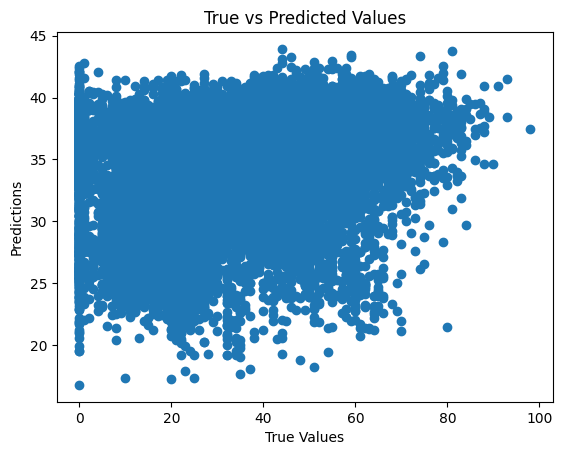

In [6]:
"""
Evaluate the model, compare train vs validation performance
"""

# Evaluate the model on the Train set
print("Training Error")
Y_pred = model.predict(X_train)
print('Train MAE:', metrics.mean_absolute_error(Y_train, Y_pred))
print('Train MSE:', metrics.mean_squared_error(Y_train, Y_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))
print('Train R2:', metrics.r2_score(Y_train, Y_pred))

# Evaluate the model on the Test set
print("Validation Error")
Y_pred = model.predict(X_test)
print('Test MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Test MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Test R2:', metrics.r2_score(Y_test, Y_pred))


# Plot the model predictions
plt.scatter(Y_test, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

- Since the performance on the training and test set is not different, we don't do regularization

In [7]:
"""
Compare coefficients with bootstrapping
"""

# define the number of bootstrap samples
n_bootstraps = 1000

# define the number of observations in the original dataset
n = X.shape[0]

# create an empty list to store the bootstrap samples
bootstrap_samples = []

# create an empty list to store the bootstrap coefficients
bootstrap_coefs = []

# for loop to generate the bootstrap samples
for i in range(n_bootstraps):
  bootstrap_sample = spotify_processed.sample(n=n, replace=True)
  bootstrap_samples.append(bootstrap_sample)
  y_bootstrap = bootstrap_sample['popularity']
  # x_bootstrap = bootstrap_sample[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
  #                                 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 
  #                                 'merged_genre_Classical/Instrumental', 'merged_genre_Electronic/Dance', 
  #                                 'merged_genre_Folk/World', 'merged_genre_Hip-Hop/R&B', 'merged_genre_Jazz/Blues', 
  #                                 'merged_genre_Latin', 'merged_genre_Other/Functional', 'merged_genre_Pop', 'merged_genre_Rock']]
  x_bootstrap = bootstrap_sample[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                                  'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
  model = LinearRegression()
  model.fit(x_bootstrap, y_bootstrap)
  bootstrap_coefs.append(model.coef_)

# convert the list of coefficients to a dataframe
bootstrap_coefs_df = pd.DataFrame(bootstrap_coefs, columns=X.columns)

# compute standard deviation of each of the bootstrap coefficients
bootstrap_coefs_std = bootstrap_coefs_df.std()

# compute the standardized coefficient
standardized_coefs = model.coef_ / bootstrap_coefs_std

print("####### Standardized Coefficients #######")
print(standardized_coefs)

# Rank the features based on the absolute value of standardized coefficients
feature_ranking = np.abs(standardized_coefs).sort_values(ascending=False)
print("\n####### Feature Ranking #######")
print(feature_ranking)

####### Standardized Coefficients #######
danceability        21.677068
energy             -11.214945
key                 -0.988029
loudness             9.037079
mode                -3.814660
speechiness        -28.609303
acousticness        -5.226038
instrumentalness   -43.100895
liveness             0.247836
valence            -20.243034
tempo               -0.365207
time_signature       3.740019
dtype: float64

####### Feature Ranking #######
instrumentalness    43.100895
speechiness         28.609303
danceability        21.677068
valence             20.243034
energy              11.214945
loudness             9.037079
acousticness         5.226038
mode                 3.814660
time_signature       3.740019
key                  0.988029
tempo                0.365207
liveness             0.247836
dtype: float64


# 4. Logistic Regression Analysis
- This will use logistic regression to predict popularity. Consider that popularity represent the general 'likeness' of a song, find out what contribute the most to popularity will help us identify the most important features of a song that could influence a user. Though in real life, an artist would have major influence on this matter, for the sake of simplicity, we will not consider artists in this study.
- We also drop duration_ms, the assumption being a song is liked not for its duration, and the information would be distracting to the model. Also there is not much correlation between duration and popularity in correlation heatmap.

In [8]:
"""
Train a model to predict the popularity of a song based on its audio features.
"""

import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

spotify_processed_popularity_binary = spotify_cleaned_final

threshold = 35 # A threshold to make popularity binary, splits between 0 and 1 approximately evenly
spotify_processed_popularity_binary['popularity_binary'] = (spotify_processed_popularity_binary['popularity'] > threshold).astype(int)

popularity_distribution = spotify_processed_popularity_binary['popularity_binary'].value_counts()
print(popularity_distribution)

Y = spotify_processed_popularity_binary['popularity_binary']
X = spotify_processed_popularity_binary[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                       'time_signature']]

numerical_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
category_features = ['mode', 'merged_genre_Classical/Instrumental', 'merged_genre_Electronic/Dance', 'merged_genre_Folk/World', 'merged_genre_Hip-Hop/R&B', 'merged_genre_Jazz/Blues', 'merged_genre_Latin', 'merged_genre_Other/Functional', 'merged_genre_Pop', 'merged_genre_Rock']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize only numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train the model
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train, Y_train)
log_model.intercept_, log_model.coef_


popularity_binary
0    42074
1    39132
Name: count, dtype: int64


(array([-0.02730949]),
 array([[ 0.28933911, -0.21665549,  0.01516013,  0.17211912, -0.08299751,
         -0.27749325,  0.00424234, -0.29932425,  0.04655534, -0.26250066,
          0.03445555,  0.04613929]]))

In [9]:
"""
Fit the model and check misclassifcation rate
"""

log_model.predict(X_test)
pred_val_sample = pd.DataFrame({'actual': Y_test, 'predicted': log_model.predict(X_test)})
count_misclassified = np.sum(pred_val_sample['actual'] != pred_val_sample['predicted'])
print('Total samples:', len(Y_test))
print('Misclassified samples:', count_misclassified)
print('Accuracy:', (len(Y_test) - count_misclassified) / len(Y_test))

Total samples: 16242
Misclassified samples: 6533
Accuracy: 0.5977712104420638


In [10]:
"""
Confusion Matrix
"""
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, log_model.predict(X_test))
conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
conf_matrix

,Predicted 0,Predicted 1
Actual 0,5148,3346
Actual 1,3187,4561


In [11]:
"""
Accuracy score, true positive rate, and true negative rate
"""

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(Y_test, log_model.predict(X_test)))
print('True Positive Rate:', conf_matrix['Predicted 1']['Actual 1'] / (conf_matrix['Predicted 1']['Actual 1'] + conf_matrix['Predicted 0']['Actual 1']))
print('True Negative Rate:', conf_matrix['Predicted 0']['Actual 0'] / (conf_matrix['Predicted 0']['Actual 0'] + conf_matrix['Predicted 1']['Actual 0']))

Accuracy: 0.5977712104420638
True Positive Rate: 0.58866804336603
True Negative Rate: 0.6060748763833295


In [12]:
"""
roc curve
"""

from sklearn.metrics import roc_curve

# log_model.predict_proba(X_val) will return the probabilities of the negative and positive classes respectively
# We are interested in the positive class so we slice the second column
positive_class_prob = log_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve variables
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, positive_class_prob)

# Create a DataFrame to store the ROC curve variables, 
# which 'False Positive Rate' and 'True Positive Rate' and 'Model' as columns 
# and the thresholds as the index
roc_log_sample = pd.DataFrame({
    'False Positive Rate': false_positive_rate,
    'True Positive Rate': true_positive_rate,
    'Model': 'Logistic Regression'
}, index=thresholds)

roc_sample_df = pd.concat([roc_log_sample])

px.line(roc_log_sample, y='True Positive Rate', x='False Positive Rate',
        color='Model',
        width=700, height=500
)

In [13]:
"""
auc score
"""

from sklearn.metrics import roc_auc_score

log_auc_score = roc_auc_score(Y_test, positive_class_prob)
print('AUC Score:', log_auc_score)

AUC Score: 0.635066422725556


In [17]:
"""
Compare coefficients with bootstrapping
"""
import warnings
from sklearn.exceptions import ConvergenceWarning

# define the number of bootstrap samples
n_bootstraps = 100

# define the number of observations in the original dataset
n = X.shape[0]

# create an empty list to store the bootstrap samples
bootstrap_samples = []

# create an empty list to store the bootstrap coefficients
bootstrap_coefs = []

# for loop to generate the bootstrap samples
for i in range(n_bootstraps):
  bootstrap_sample = spotify_processed_popularity_binary.sample(n=n, replace=True)
  bootstrap_samples.append(bootstrap_sample)
  y_bootstrap = bootstrap_sample['popularity_binary']
  x_bootstrap = bootstrap_sample[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                                  'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
  warnings.filterwarnings("ignore", category=ConvergenceWarning)
  bl_model = LogisticRegression()
  bl_model.fit(x_bootstrap, y_bootstrap)
  # Reshape the coefficients to a 1D array
  bl_model_coef = bl_model.coef_.reshape(-1)
  bootstrap_coefs.append(bl_model_coef)

# convert the list of coefficients to a dataframe
bootstrap_coefs_df = pd.DataFrame(bootstrap_coefs, columns=X.columns)

# compute standard deviation of each of the bootstrap coefficients
bootstrap_coefs_std = bootstrap_coefs_df.std()

# compute the standardized coefficient
standardized_coefs = (bl_model.coef_).reshape(-1) / bootstrap_coefs_std

print("####### Standardized Coefficients #######")
print(standardized_coefs)

# Rank the features based on the absolute value of standardized coefficients
feature_ranking = np.abs(standardized_coefs).sort_values(ascending=False)
print("\n####### Feature Ranking #######")
print(feature_ranking)

####### Standardized Coefficients #######
danceability         7.737844
energy             -17.023977
key                  1.179305
loudness             9.418402
mode                -0.787470
speechiness         -6.989250
acousticness        -3.401016
instrumentalness   -15.939420
liveness             0.640533
valence            -13.094187
tempo                2.852511
time_signature       1.784745
dtype: float64

####### Feature Ranking #######
energy              17.023977
instrumentalness    15.939420
valence             13.094187
loudness             9.418402
danceability         7.737844
speechiness          6.989250
acousticness         3.401016
tempo                2.852511
time_signature       1.784745
key                  1.179305
mode                 0.787470
liveness             0.640533
dtype: float64
